In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

In [2]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("calpella"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all
Train Basin File Exists: True


In [3]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("calpella_gage.yaml")
path_to_physics_data = Path("/Users/mia/research/calpella_data_folder/new_calpella.csv")
params = {
    "epochs":32
}
features_with_physics = [
    #from daily
    # "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW calpella - calibration',
    'EF Russian 20 ET-POTENTIAL calpella - calibration',
    'EF Russian 20 FLOW calpella - calibration',
    'EF Russian 20 FLOW-BASE calpella - calibration',
    'EF Russian 20 INFILTRATION calpella - calibration',
    'EF Russian 20 PERC-SOIL calpella - calibration',
    'EF Russian 20 SATURATION FRACTION calpella - calibration'
]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [4]:
lstmPhysics.train()

2024-12-02 15:49:06,452: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_0212_154906/output.log initialized.
2024-12-02 15:49:06,454: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_0212_154906
2024-12-02 15:49:06,455: ### Run configurations for testing_run
2024-12-02 15:49:06,475: experiment_name: testing_run
2024-12-02 15:49:06,484: train_basin_file: calpella
2024-12-02 15:49:06,486: validation_basin_file: calpella
2024-12-02 15:49:06,491: test_basin_file: calpella
2024-12-02 15:49:06,493: train_start_date: 1994-10-01 00:00:00
2024-12-02 15:49:06,494: train_end_date: 2002-09-30 00:00:00
2024-12-02 15:49:06,498: validation_start_date: 2002-10-01 00:00:00
2024-12-02 15:49:06,503: validation_end_date: 2005-09-30 00:00:00
2024-12-02 15:49:06,505: test_start_date: 2005-10-01 00:00:00
2024-12-02 15:49:06,506: test_end_date: 2009-09-30 00:00:00
2024-12-02 15:49:06,508: device: cpu


Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL


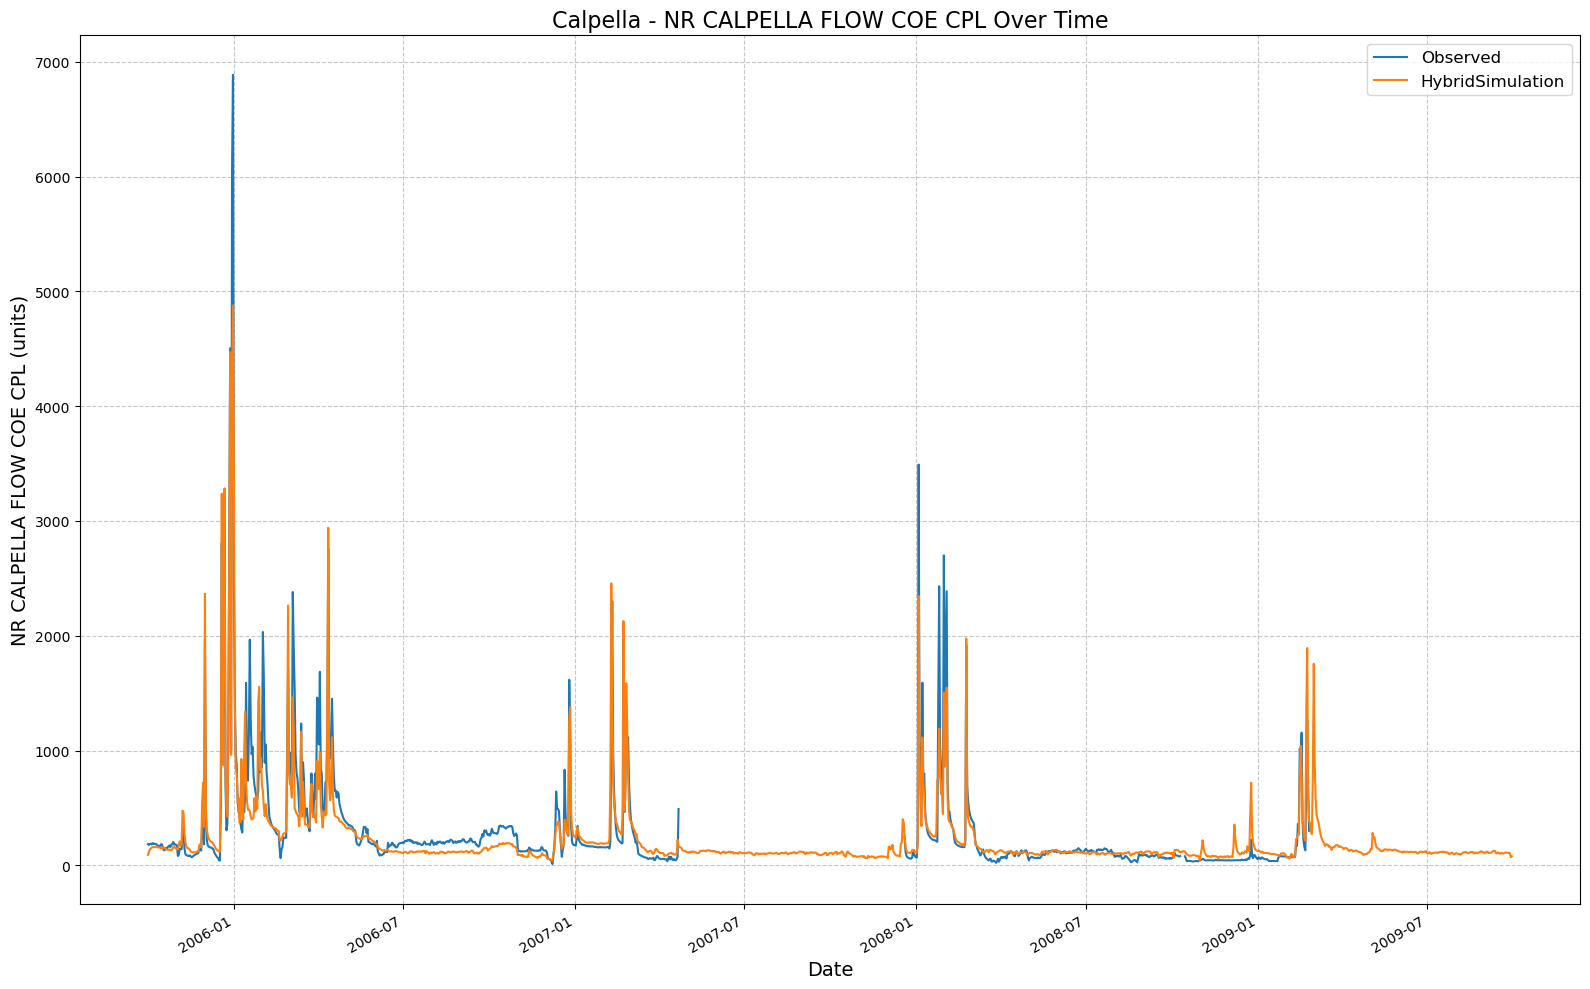

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_0212_154906/results_output.csv


{'NSE': 0.82171331346035,
 'MSE': 45406.01171875,
 'RMSE': 213.08686425669228,
 'KGE': 0.8046728098036519,
 'Alpha-NSE': 0.8451136896681363,
 'Beta-KGE': 0.9221948981285095,
 'Beta-NSE': -0.045706748511592954,
 'Pearson-r': 0.9099483024893537,
 'FHV': -9.317843616008759,
 'FMS': -18.54472202520304,
 'FLV': 52.12927661930262,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 27.858402729034427}

In [5]:
lstmPhysics.results()